### A quick note on this notebook

This notebook was prepared to generate supplementary data for a presentation I have in April. As such, consider this more of a "scratchpad" than a narrative-driven data exploration. Feel free to email me at LechterVentures@gmail.com if you have any questions here.

In [1]:
#Import libs
import ffn as f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import datetime as dt
from datetime import timedelta, datetime
from IPython.display import display, HTML, display_html, Markdown
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
yf.pdr_override() #hack used to access yahoo finance data for pandas data manipulation

In [10]:
#Get S&P 500 data
ticker = '^GSPC'
df_spx = pdr.get_data_yahoo(ticker, start = '1970-01-01', interval='d')
df_spx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-01-02,93.540001,91.790001,92.059998,93.000000,8050000,93.000000
1970-01-05,94.250000,92.529999,93.000000,93.459999,11490000,93.459999
1970-01-06,93.809998,92.129997,93.459999,92.820000,11460000,92.820000
1970-01-07,93.379997,91.930000,92.820000,92.629997,10010000,92.629997
1970-01-08,93.470001,91.989998,92.629997,92.680000,10670000,92.680000


In [32]:
#Feature Engineering
df_spx['Open_to_Close_Pct_Difference'] = round((df_spx['Close'] - df_spx['Open']) / df_spx['Open'],3)
df_spx['Yesterday_Open'] = df_spx['Open'].shift(1)
df_spx['Open_to_Open_Pct_Difference'] = round((df_spx['Open'] - df_spx['Yesterday_Open']) / df_spx['Yesterday_Open'],3)
df_spx.head()

,High,Low,Open,Close,Volume,Adj Close,Open_to_Close_Pct_Difference,Yesterday_Open,Open_to_Open_Pct_Difference
Date,,,,,,,,,
1970-01-02,93.540001,91.790001,92.059998,93.000000,8050000,93.000000,0.010,NaN,NaN
1970-01-05,94.250000,92.529999,93.000000,93.459999,11490000,93.459999,0.005,92.059998,0.010
1970-01-06,93.809998,92.129997,93.459999,92.820000,11460000,92.820000,-0.007,93.000000,0.005
1970-01-07,93.379997,91.930000,92.820000,92.629997,10010000,92.629997,-0.002,93.459999,-0.007
1970-01-08,93.470001,91.989998,92.629997,92.680000,10670000,92.680000,0.001,92.820000,-0.002


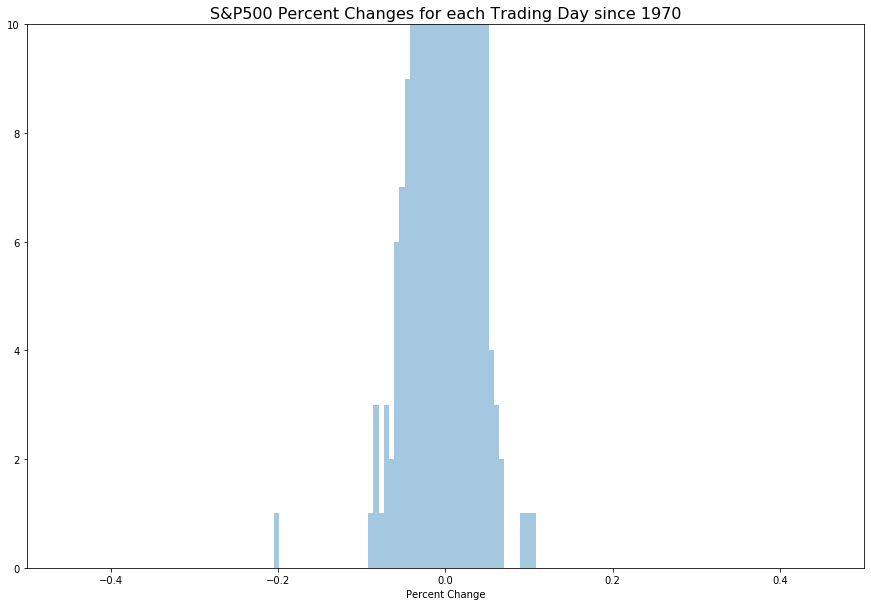

In [21]:
#What has the distribution of open-to-close % changes looked like each trading day since 1970?
plt.figure(figsize = (15,10))
plt.title('S&P500 Percent Changes for each Trading Day since 1970', fontdict= {'size':16})
sns.distplot(df_spx['Open_to_Close_Pct_Difference'], kde = False)
plt.ylim(0,10)
plt.xlim(-0.5,0.5)
plt.xlabel('Percent Change');

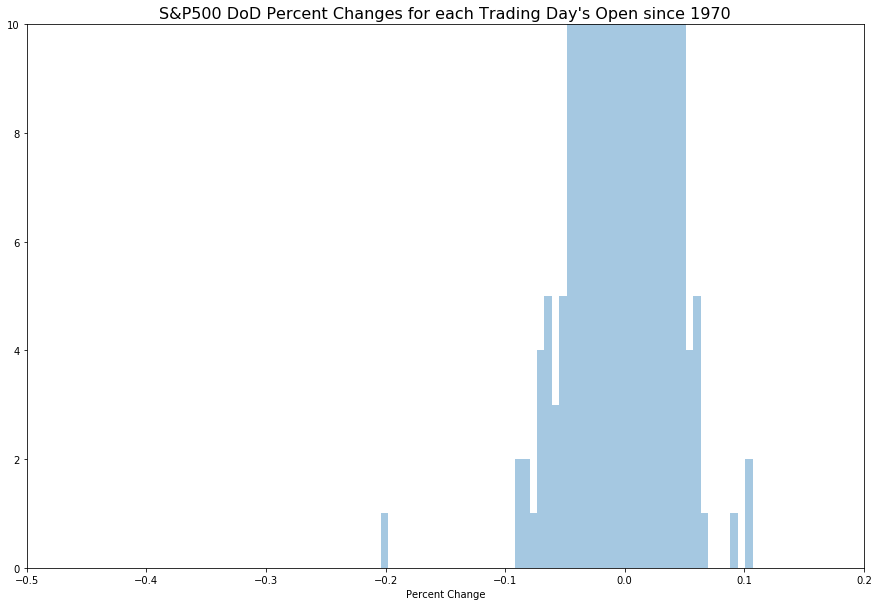

In [29]:
#What have open-to-open % changes looked like?
plt.figure(figsize = (15,10))
plt.title('''S&P500 DoD Percent Changes for each Trading Day's Open since 1970''', fontdict= {'size':16})
sns.distplot(df_spx[1:]['Open_to_Open_Pct_Difference'], kde = False)
plt.ylim(0,10)
plt.xlim(-0.5,0.2)
plt.xlabel('Percent Change');

In [30]:
#Summary stats for % moves?
display(pd.DataFrame(df_spx['Open_to_Close_Pct_Difference'].describe()))
display(pd.DataFrame(df_spx['Open_to_Open_Pct_Difference'].describe()))

,Open_to_Close_Pct_Difference
count,12691.000000
mean,0.000314
std,0.010268
min,-0.205000
25%,-0.004000
50%,0.000000
75%,0.005000
max,0.108000


,Open_to_Open_Pct_Difference
count,12690.000000
mean,0.000324
std,0.010374
min,-0.204000
25%,-0.005000
50%,0.001000
75%,0.005000
max,0.107000


In [31]:
display(df_spx[df_spx['Open_to_Close_Pct_Difference'] < -0.1])
display(df_spx[df_spx['Open_to_Open_Pct_Difference'] < -0.1])

,High,Low,Open,Close,Volume,Adj Close,Open_to_Close_Pct_Difference,Yesterday_Open,Open_to_Open_Pct_Difference
Date,,,,,,,,,
1987-10-19,282.700012,224.830002,282.700012,224.839996,604300000,224.839996,-0.205,298.079987,-0.052


,High,Low,Open,Close,Volume,Adj Close,Open_to_Close_Pct_Difference,Yesterday_Open,Open_to_Open_Pct_Difference
Date,,,,,,,,,
1987-10-20,245.619995,216.460007,225.059998,236.830002,608100000,236.830002,0.052,282.700012,-0.204


In [34]:
df_spx_annualized_returns = pd.read_csv('Annualized S&P 500 Returns - sp-500-historical-annual-returns.csv')
df_spx_annualized_returns.head() #Source: https://tinyurl.com/ydd7yjnf

,date,value
0,1928-12-31,37.88
1,1929-12-31,-11.91
2,1930-12-31,-28.48
3,1931-12-31,-47.07
4,1932-12-31,-15.15


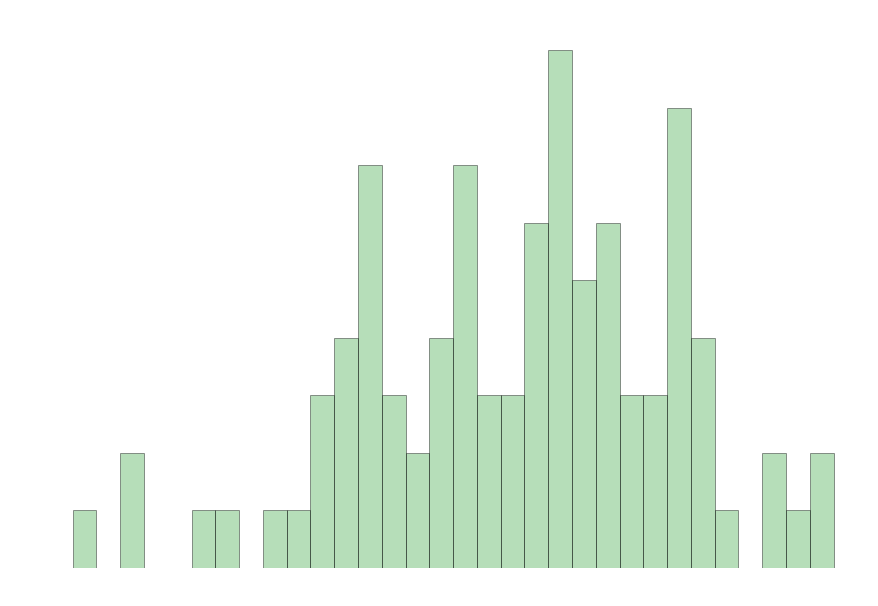

In [80]:
#What have annualized returns looked like
plt.figure(figsize = (15,10))
sns.set_style({'axes.edgecolor': 'white', 'axes.labelcolor': 'white', 'text.color': 'white',
              'xtick.color': 'white', 'ytick.color': 'white'})
plt.title('''S&P500 Annualized Returns since 1928''', fontdict= {'size':16, 'color':'white'})
sns.distplot(df_spx_annualized_returns['value'], kde = False, bins = 32, color = '#4AAD52', 
             hist_kws = {'edgecolor':'black',
                       'linewidth':1, 'linestyle':'-'})
# plt.xlim(color = 'white')
plt.ylabel('Frequency', color = 'white')
plt.xlabel('Percent Change', color = 'white');

In [81]:
#What are summary stats here?
display(pd.DataFrame(round(df_spx_annualized_returns['value'].describe(),3)))

#how many -10% years have there been?
display(df_spx_annualized_returns[df_spx_annualized_returns['value'] < -10].count()[0])

#how many -20% years have there been?
display(df_spx_annualized_returns[df_spx_annualized_returns['value'] < -20].count()[0])

,value
count,93.000
mean,7.468
std,19.165
min,-47.070
25%,-6.240
50%,10.260
75%,20.260
max,46.590


20

6